# Coregister ArcticDEM and OIB DEMs to the IFSAR grid

In [1]:
import os
import re
import xdem
import matplotlib.pyplot as plt
import geoutils as gu
import numpy as np
import pyproj
import pandas as pd
import geopandas as gpd
import glob
from tqdm.auto import tqdm
import rioxarray as rxr
import xarray as xr
import rasterio as rio
import datetime

In [21]:
# -----Define paths in directory
# root directory to all data
data_path = '/Users/raineyaberle/Research/PhD/Hubbard'
# path for output coregistered files
out_path = os.path.join(data_path, 'surface_elevation', 'surface_elevation_filtered')
# file name of RGI glacier boundaries and clipped boundaries
aoi_fn = os.path.join(data_path, 'RGI', 'Hubbard_boundaries.shp')
aoi_clipped_fn = os.path.join(data_path, 'RGI', 'Hubbard_boundaries_clipped.shp')
# file name of IFSAR DEM
ifsar_fn = os.path.join(data_path, 'surface_elevation', 'ifsar_hubbardDEM.tif')

# -----Figure options
# whether to plot DEMs after coregistration
plot_dems = True
# whether to save figures of the coregistered DEMs
save_figures = False
# path for saving figures
figures_out_path = os.path.join(data_path, 'figures')

## Load glacier boundaries and IFSAR DEM

Clipped glacier boundaries loaded from file.


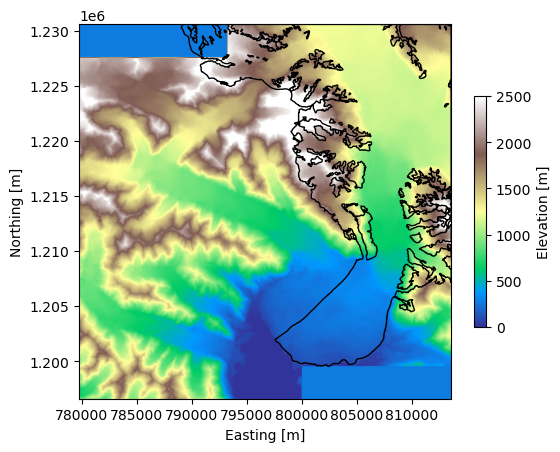

In [22]:
# -----Load IFSAR DEM
# load IFSAR DEM in AK albers projection
ifsar = xdem.DEM(ifsar_fn)
# tell XDEM what vertical projection it's in
ifsar.set_vcrs(pyproj.CRS("EPSG:5703"))
# set vcrs from geoid to ellipsoid
ifsar.to_vcrs("Ellipsoid")

# -----Load clipped glacier boundaries
# Check if clipped boundaries already exists in directory
if not os.path.exists(aoi_clipped_fn):
    # grab bounds from IFSAR
    xmin, xmax = ifsar.bounds.left, ifsar.bounds.right
    ymin, ymax = ifsar.bounds.bottom, ifsar.bounds.top
    from shapely.ops import clip_by_rect
    # load AOI using geopandas
    aoi = gpd.read_file(aoi_fn)
    aoi = aoi.to_crs('EPSG:3338')
    aoi_clipped = clip_by_rect(aoi.geometry[0], xmin, ymin, xmax, ymax)
    aoi_clipped_gdf = gpd.GeoDataFrame(geometry=[aoi_clipped], crs='EPSG:3338')
    # save to file
    aoi_clipped_gdf.to_file(aoi_clipped_fn)
    print('Clipped glacier boundaries saved to file:', aoi_clipped_fn)
# Load as geoutils.Vector
aoi_clipped_gu = gu.Vector(aoi_clipped_fn)
print('Clipped glacier boundaries loaded from file.')
# Reproject AOI to IFSAR CRS
aoi_clipped_gu = aoi_clipped_gu.reproject(ifsar)

# -----Plot
fig, ax = plt.subplots(1, 1, figsize=(6,6))
dem_im = ax.imshow(ifsar.data, cmap="terrain", clim=(0, 2.5e3),
                   extent=(ifsar.bounds.left, ifsar.bounds.right, 
                           ifsar.bounds.bottom, ifsar.bounds.top))
fig.colorbar(dem_im, ax=ax, shrink=0.5, label='Elevation [m]')
aoi_clipped_gu.show(ax=ax, facecolor='None', edgecolor='k')
ax.set_xlabel('Easting [m]')
ax.set_ylabel('Northing [m]')
plt.show()

## Coregister DEMs to IFSAR, save to file

In [24]:
# -----Grab DEM file names
arcticdem_fns = sorted(glob.glob(os.path.join(data_path, 'surface_elevation', 'ArcticDEM', '*.tif')))
oib_fns = sorted(glob.glob(os.path.join(data_path, 'surface_elevation', 'OIB_lidar', '*10m.tif')))
dem_fns = arcticdem_fns + oib_fns
print(f'Number of DEMs = {len(dem_fns)}')
[os.path.basename(x) for x in dem_fns]

Number of DEMs = 13


['Hubbard.2012.145_10m.tif',
 'Hubbard.2012.228_10m.tif',
 'Hubbard.2013.141_10m.tif',
 'Hubbard_Valerie.2012.081_10m.tif',
 'ILAKS1B_2014_137_Hubbard_10m.tif',
 'ILAKS1B_2015_139_Hubbard_10m.tif',
 'ILAKS1B_2016_136_Hubbard_10m.tif',
 'ILAKS1B_2016_217_Hubbard_10m.tif',
 'ILAKS1B_2018_143_Hubbard_10m.tif',
 'ILAKS1B_2019_271_Hubbard_10m.tif',
 'ILAKS1B_2020_142_Hubbard_10m.tif',
 'ILAKS1B_2020_156_Hubbard_10m.tif',
 'ILAKS1B_2020_157_Hubbard_10m.tif']

In [25]:
# -----Define DEMs to filter
filter_deets = [['2010-08-26', 'ArcticDEM'],
                ['2011-07-06', 'ArcticDEM'],
                ['2011-07-11', 'ArcticDEM'],
                ['2011-10-04', 'ArcticDEM'],
                ['2015-08-29', 'ArcticDEM'],
                ['2016-09-17', 'ArcticDEM'],
                ['2017-01-29', 'ArcticDEM'],
                ['2019-05-03', 'ArcticDEM'],
                ['2020-05-30', 'ArcticDEM'],
                ['2020-11-18', 'ArcticDEM'],
                ['2021-02-08', 'ArcticDEM']]

  0%|          | 0/13 [00:00<?, ?it/s]

OIB 2012-05-24
Coregistered DEM saved to file:  /Users/raineyaberle/Research/PhD/Hubbard/surface_elevation/surface_elevation_filtered/2012-05-24_OIB_Hubbard.tif


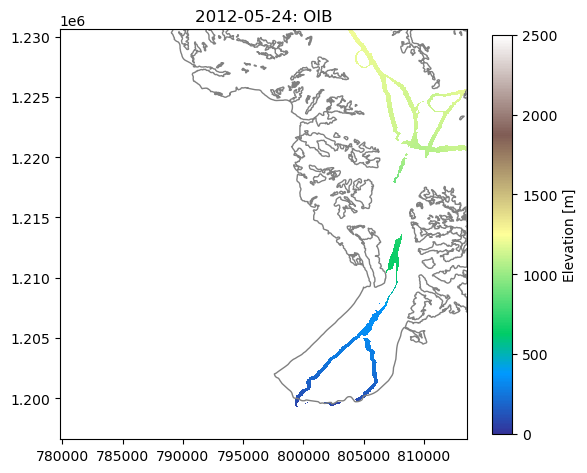

OIB 2012-08-15
'dem_to_be_aligned' had only NaNs
OIB 2013-05-21
Coregistered DEM saved to file:  /Users/raineyaberle/Research/PhD/Hubbard/surface_elevation/surface_elevation_filtered/2013-05-21_OIB_Hubbard.tif


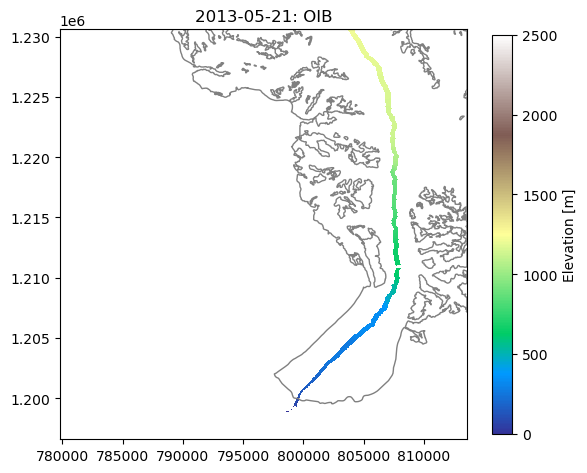

OIB 2012-03-21
Coregistered DEM saved to file:  /Users/raineyaberle/Research/PhD/Hubbard/surface_elevation/surface_elevation_filtered/2012-03-21_OIB_Hubbard.tif


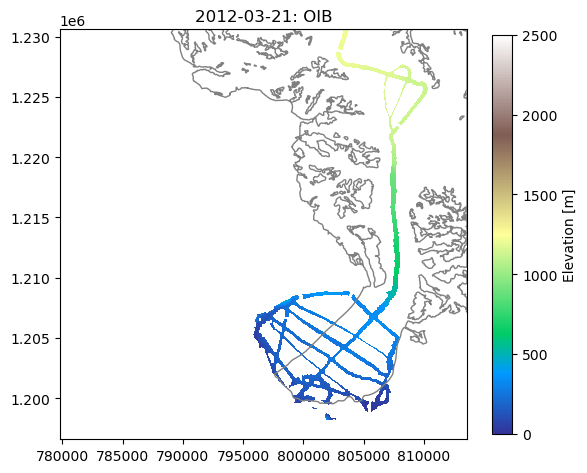

OIB 2014-05-17
Coregistered DEM saved to file:  /Users/raineyaberle/Research/PhD/Hubbard/surface_elevation/surface_elevation_filtered/2014-05-17_OIB_Hubbard.tif


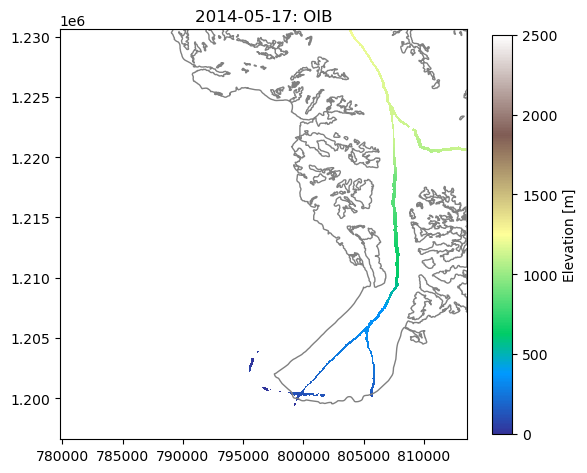

OIB 2015-05-19
Coregistered DEM saved to file:  /Users/raineyaberle/Research/PhD/Hubbard/surface_elevation/surface_elevation_filtered/2015-05-19_OIB_Hubbard.tif


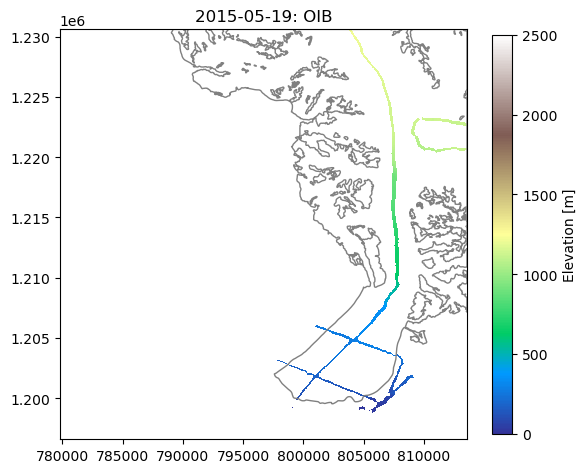

OIB 2016-05-15
Coregistered DEM saved to file:  /Users/raineyaberle/Research/PhD/Hubbard/surface_elevation/surface_elevation_filtered/2016-05-15_OIB_Hubbard.tif


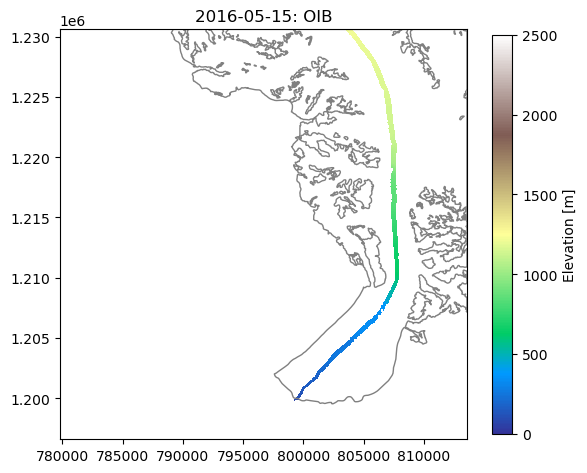

OIB 2016-08-04
'dem_to_be_aligned' had only NaNs
OIB 2018-05-23
Coregistered DEM saved to file:  /Users/raineyaberle/Research/PhD/Hubbard/surface_elevation/surface_elevation_filtered/2018-05-23_OIB_Hubbard.tif


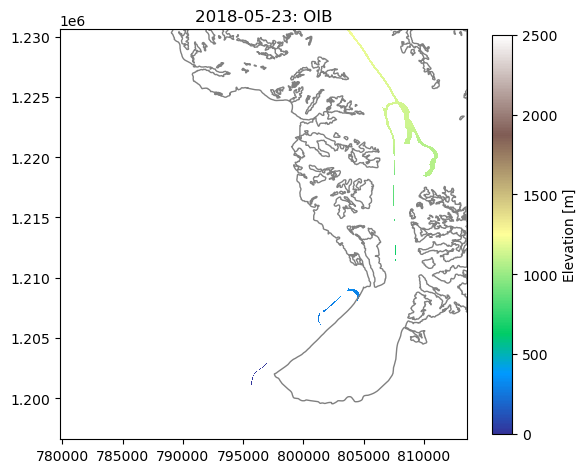

OIB 2019-09-28
Coregistered DEM saved to file:  /Users/raineyaberle/Research/PhD/Hubbard/surface_elevation/surface_elevation_filtered/2019-09-28_OIB_Hubbard.tif


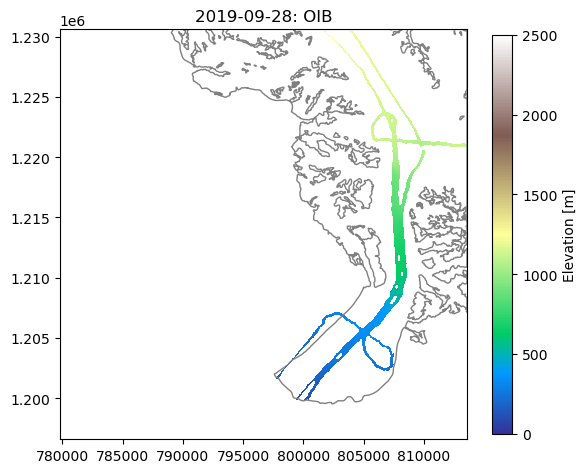

OIB 2020-05-21
'dem_to_be_aligned' had only NaNs
OIB 2020-06-04
'dem_to_be_aligned' had only NaNs
OIB 2020-06-05
Coregistered DEM saved to file:  /Users/raineyaberle/Research/PhD/Hubbard/surface_elevation/surface_elevation_filtered/2020-06-05_OIB_Hubbard.tif


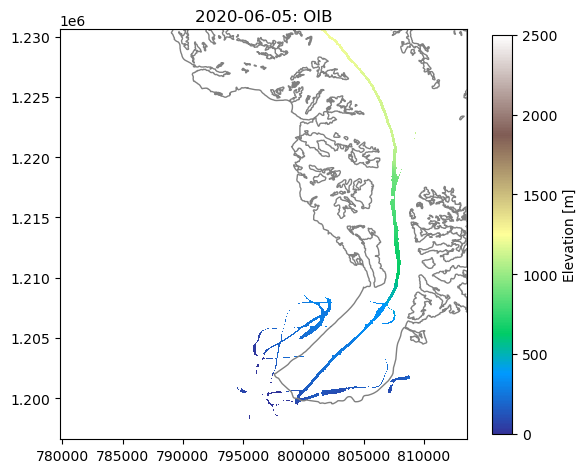

In [28]:
# -----Check if out_path exists
if not os.path.exists(out_path):
    os.mkdir(out_path)
    print('Created out_path:', out_path)

# -----Iterate over DEMs and coregister
for dem_fn in tqdm(dem_fns):
    # Grab dataset and date from file name
    if 'SETSM' in os.path.basename(dem_fn):
        dataset = 'ArcticDEM'
        date = os.path.basename(dem_fn).split('_')[3]
        date = f'{date[0:4]}-{date[4:6]}-{date[6:8]}'
    elif 'Hubbard.' in dem_fn:
        dataset = 'OIB'
        year = dem_fn.split('Hubbard.')[1][0:4]
        julian_day = dem_fn.split('Hubbard.' + year + '.')[1][0:3]
        date = str(datetime.datetime.strptime(year + julian_day, '%Y%j').date())
    elif 'Valerie.' in dem_fn:
        dataset = 'OIB'
        year = dem_fn.split('Valerie.')[1][0:4]
        julian_day = dem_fn.split('Valerie.' + year + '.')[1][0:3]
        date = str(datetime.datetime.strptime(year + julian_day, '%Y%j').date())
    elif 'ILAKS' in dem_fn:
        dataset = 'OIB'
        year = dem_fn.split('ILAKS1B_')[1][0:4]
        julian_day = dem_fn.split('ILAKS1B_' + year + '_')[1][0:3]
        date = str(datetime.datetime.strptime(year + julian_day, '%Y%j').date())
    print(dataset, date)

    # Check if coregistered DEM already exists in file
    dem_out_fn = os.path.join(out_path, f'{date}_{dataset}_Hubbard.tif')
    if os.path.exists(dem_out_fn):
        # load coregistered DEM
        aligned_dem = xdem.DEM(dem_out_fn)
        print('Coregistered DEM loaded from file.')
        
    # Check if DEM is on the filter list
    elif [date[0:10], dataset] in filter_deets:
        print('DEM on the filter list, skipping...')
        continue
        
    else:
        
        # load DEM using rasterio to extract just the first band (mean point elevations)
        with rio.open(dem_fn) as src:
            array = src.read(1)
            transform = src.transform
            crs = src.crs
        # load DEM as xdem.DEM
        dem = xdem.DEM.from_array(array, transform=transform, crs=crs)
        # account for no data values
        dem.data.data[(dem.data.data==-9999) | (dem.data.data==0) | (dem.data.data==-99999)] = np.nan
    
        # Reproject DEM to IFSAR CRS
        dem = dem.reproject(ifsar)
    
        # Coregister DEM to IFSAR DEM
        nuth_kaab = xdem.coreg.NuthKaab()
        try:
            nuth_kaab.fit(ifsar, dem) # Fit the data to a suitable x/y/z offset
            aligned_dem = nuth_kaab.apply(dem) # Apply the transformation to the data
        except Exception as e:
            print(e)
            continue

        # Save coregistered DEM to file
        aligned_dem.save(dem_out_fn)
        print('Coregistered DEM saved to file: ', dem_out_fn)

        # Plot coregistered DEM and save figure
        if plot_dems:
            fig, ax = plt.subplots(1, 1, figsize=(6, 6))
            dem_im = ax.imshow(aligned_dem.data, cmap="terrain", vmin=0, vmax=2.5e3,
                               extent=(ifsar.bounds.left, ifsar.bounds.right, 
                                       ifsar.bounds.bottom, ifsar.bounds.top))
            fig.colorbar(dem_im, shrink=0.7, label='Elevation [m]')
            aoi_clipped_gu.show(ax=ax, facecolor='None', edgecolor='grey')
            
            ax.set_title(f'{date}: {dataset}')
            plt.tight_layout()
            plt.show()

            # Save figure
            if save_figures:
                fig_fn = os.path.join(figures_out_path, f'{date[0:10]}_{dataset}_surface_elevation_Hubbard.png')
                fig.savefig(fig_fn, dpi=200, bbox_inches='tight')
                print('figure saved to file: ', fig_fn)
                print(' ')